### Installing dependencies

In [1]:
# Install required packages
%pip install pandas numpy matplotlib seaborn scipy scikit-learn factor_analyzer

Note: you may need to restart the kernel to use updated packages.


### Importing necessary libraries

In [2]:
# For data manipulation
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical tests and preprocessing
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from scipy import stats

### Loading the dataset

In [3]:
# Load the data into a pandas DataFrame
print("Loading data:")
try:
    df = pd.read_csv('Automobile.csv')
    print("Dataset 'Automobile.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: 'Automobile.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Perform an initial inspection of the data
print("\nInitial data inspection:")
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset information:")
df.info()

print("\nChecking for missing values:")
print(df.isnull().sum())
print("No missing values found.")

Loading data:
Dataset 'Automobile.csv' loaded successfully.

Initial data inspection:
First 5 rows of the dataset:
                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  16.0          8         304.0       150.0   
4                ford torino  17.0          8         302.0       140.0   

   weight  acceleration  model_year origin  
0    3504          12.0          70    usa  
1    3693          11.5          70    usa  
2    3436          11.0          70    usa  
3    3433          12.0          70    usa  
4    3449          10.5          70    usa  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dty

### Preprocessing the dataset

In [4]:
# Drop the columns that are not not useful for analysis
if 'name' in df.columns:
    df.drop('name', axis=1, inplace=True)
    print("Dropped 'name' column.")
    
if 'origin' in df.columns:
    df.drop('origin', axis=1, inplace=True)
    print("Dropped 'origin' column.")

# Drop rows with any missing values (NaN)
df.dropna(inplace=True)
print("\nRows with missing values have been dropped.")

# Check the shape of the dataframe after cleaning
print(f"The shape of the cleaned dataset is: {df.shape}")

# Display the first few rows again to see the changes
print("\nData inpection after conversion:")
print("First 5 rows of the processed dataset:")
print(df.head())

print("\nUpdated dataset information:")
df.info()

Dropped 'name' column.
Dropped 'origin' column.

Rows with missing values have been dropped.
The shape of the cleaned dataset is: (392, 7)

Data inpection after conversion:
First 5 rows of the processed dataset:
    mpg  cylinders  displacement  horsepower  weight  acceleration  model_year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70

Updated dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displace

### Inpecting the dataset

In [5]:
# Calculate and display descriptive statistics
print("\nDescriptive statistics:")
descriptive_stats = df.describe()
print(descriptive_stats)

# Calculate and display skewness and kurtosis
print("\nSkewness and kurtosis:")
skewness = df.skew()
kurtosis = df.kurt()
stats_summary = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
print(stats_summary)


Descriptive statistics:
              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    392.000000  392.000000  
mean      15.541327   75.979592  
std        2.758864    3.683737  
min        8.000000   70.000000  
25%       13.775000   73.000000  
50%       15.500000   76.000000  
75%       17.025000   79.000000  
max       24.800000   82.000000  

Skewness and kurtos

In [6]:
# Calculate the number of bins using Sturges' formula
n = len(df)
num_bins = int(np.ceil(1 + np.log2(n)))

print(f"Number of observations: {n}")
print(f"Calculated number of bins using Sturges' formula: {num_bins}")

Number of observations: 392
Calculated number of bins using Sturges' formula: 10



Generating histograms for each variable:


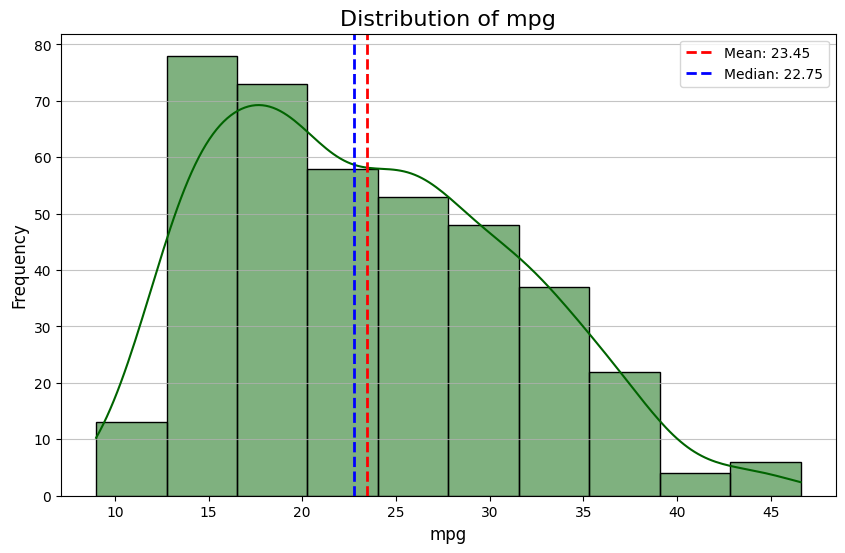

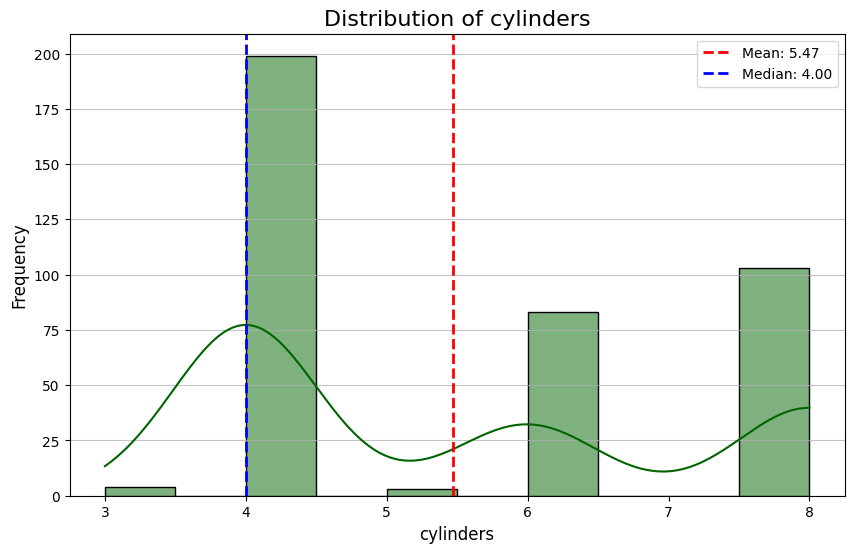

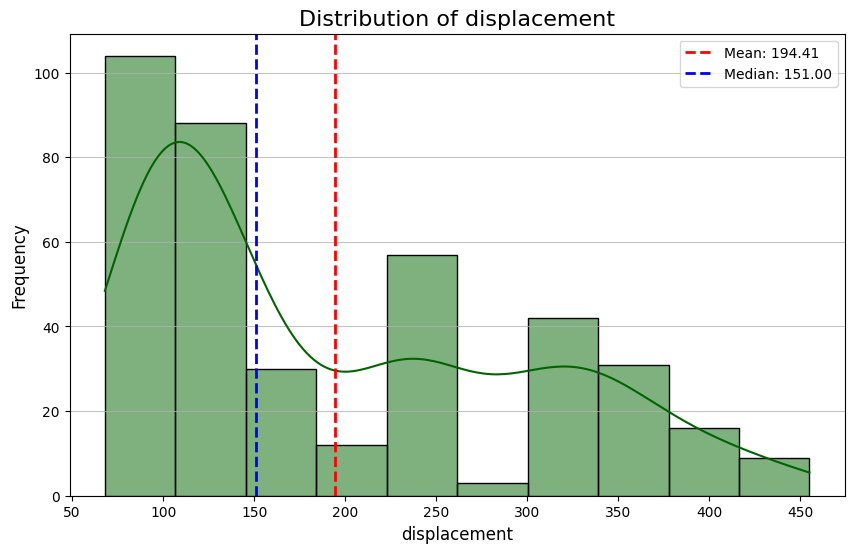

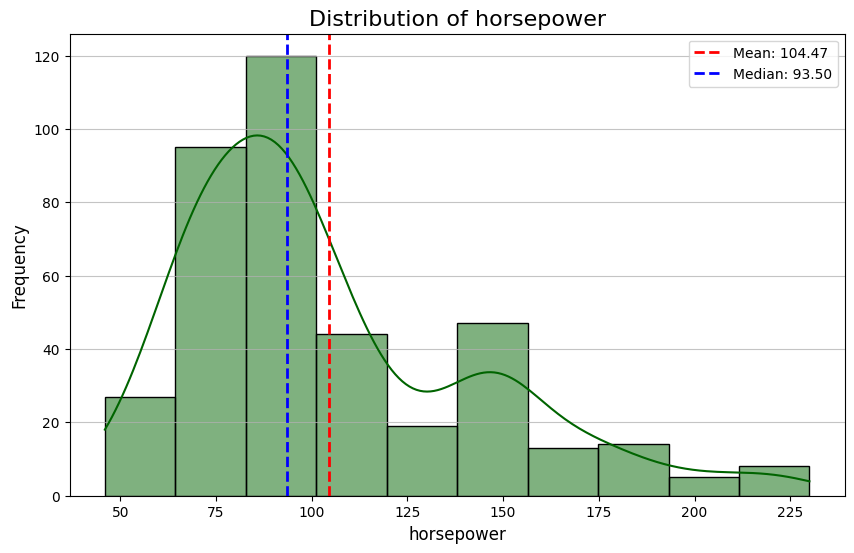

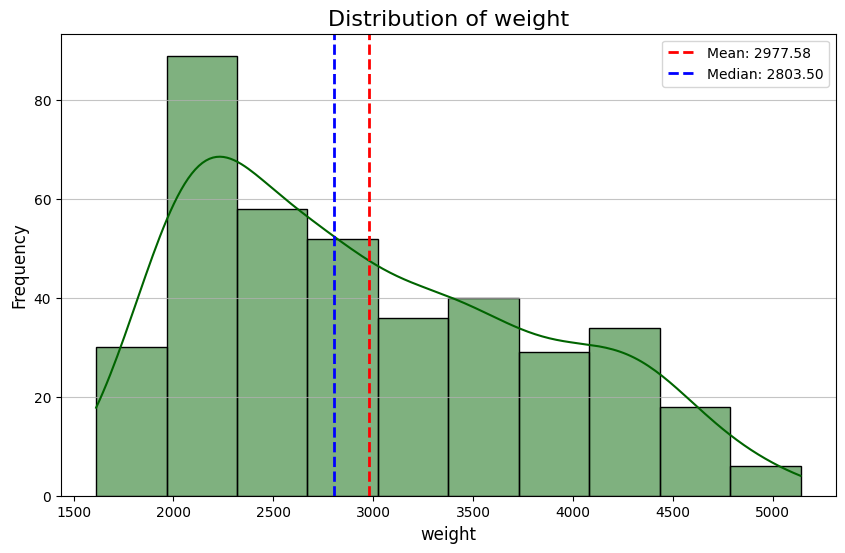

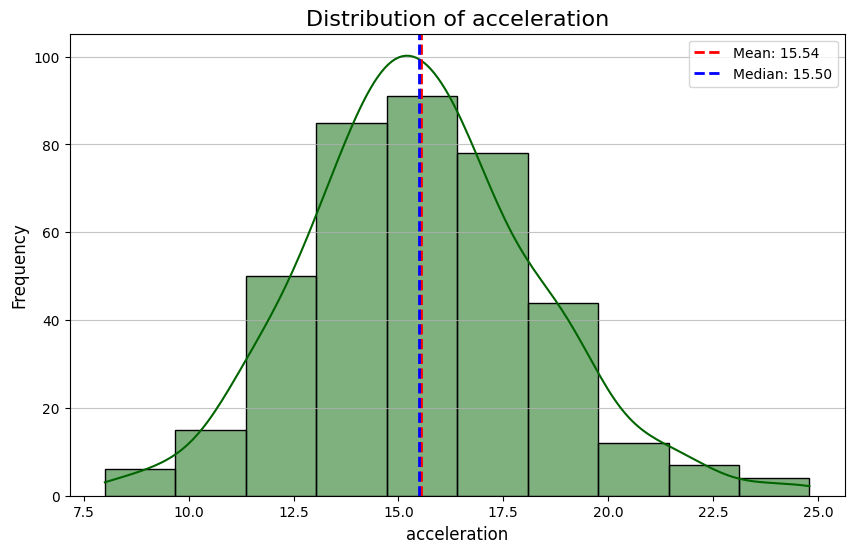

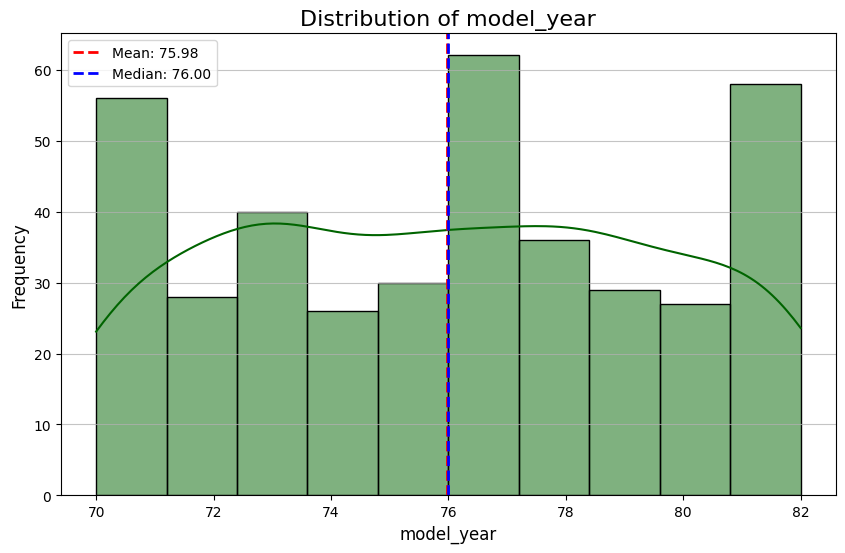

In [7]:
# Plot a histogram for each numerical variable to visually assess normality
print("\nGenerating histograms for each variable:")
for column in df.columns:
    plt.figure(figsize=(10, 6))
    
    # Plot the histogram using seaborn for a better look and a KDE curve
    sns.histplot(df[column], bins=num_bins, kde=True, color='darkgreen')
    
    # Add titles and labels for clarity
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add vertical lines for mean and median to visualize skewness
    mean_val = df[column].mean()
    median_val = df[column].median()
    
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

### Analyzing correlations

Calculating correlation matrices...

Pearson Correlation Matrix Heatmap:


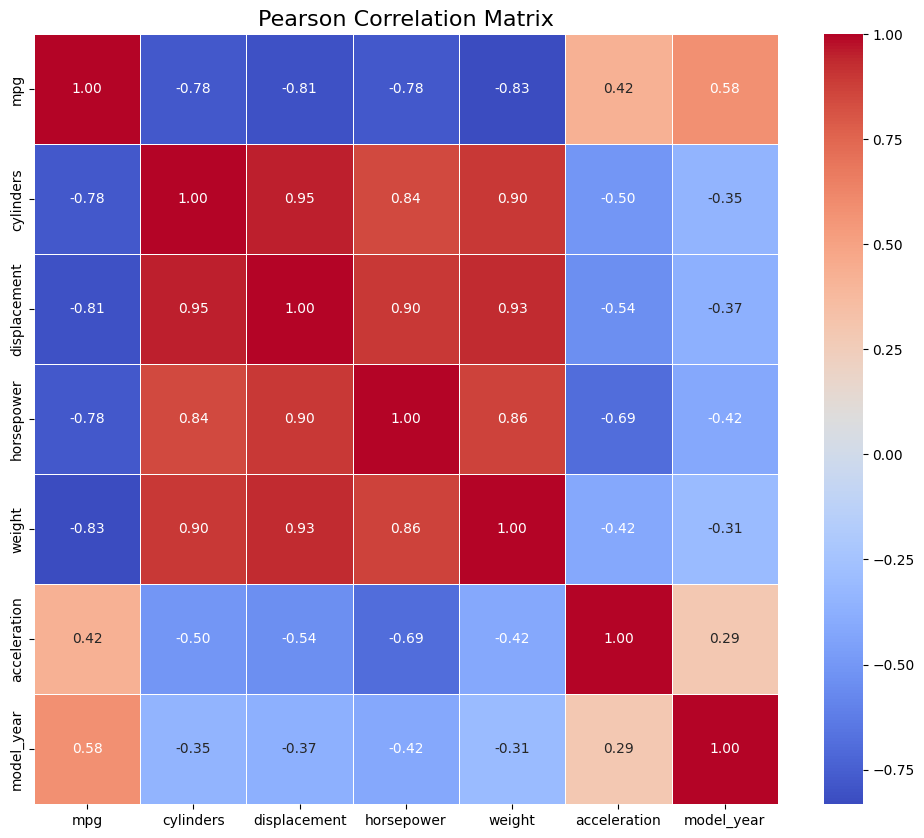


Spearman Correlation Matrix Heatmap:


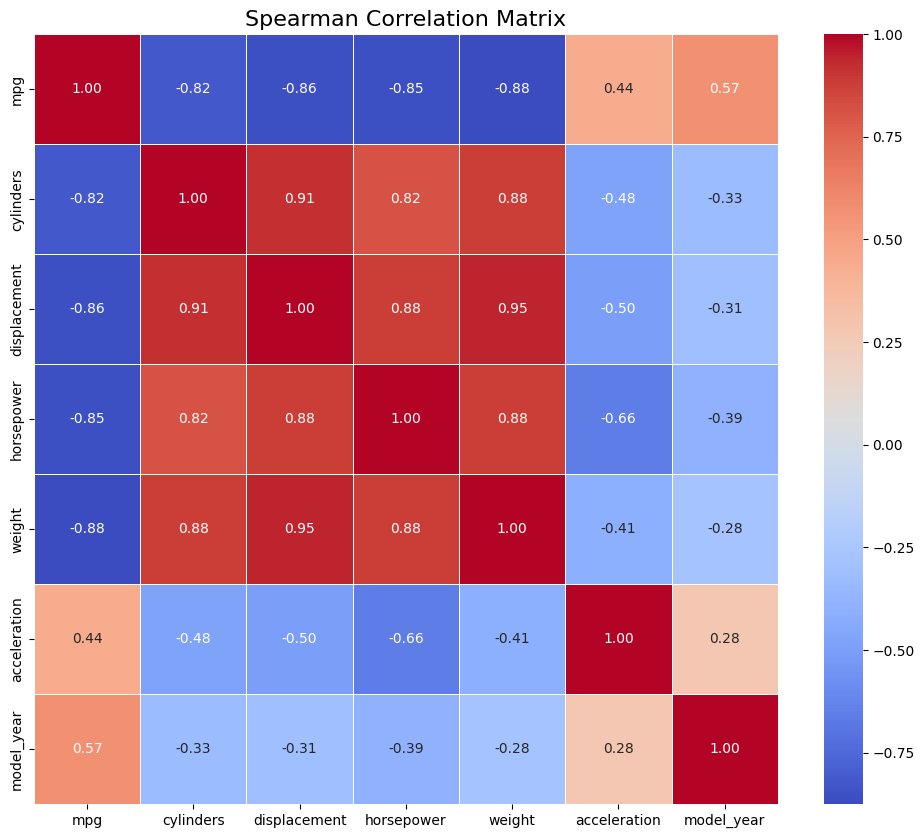

In [8]:
# Calculate Pearson and Spearman correlation matrices
print("Calculating correlation matrices...")
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

# Visualize the Pearson correlation matrix
print("\nPearson Correlation Matrix Heatmap:")
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.show()

# Visualize the Spearman correlation matrix
print("\nSpearman Correlation Matrix Heatmap:")
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Spearman Correlation Matrix', fontsize=16)
plt.show()

In [9]:
# Define alpha
alpha = 0.05

print(f"Significance level: {alpha}")

Significance level: 0.05


Generating Pearson correlation significance matrix...


C:\Users\kasht\AppData\Local\Temp\ipykernel_15692\3399758375.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  labels_pearson = p_values_pearson.applymap(lambda p: 'Significant' if p < alpha else 'Not Significant')


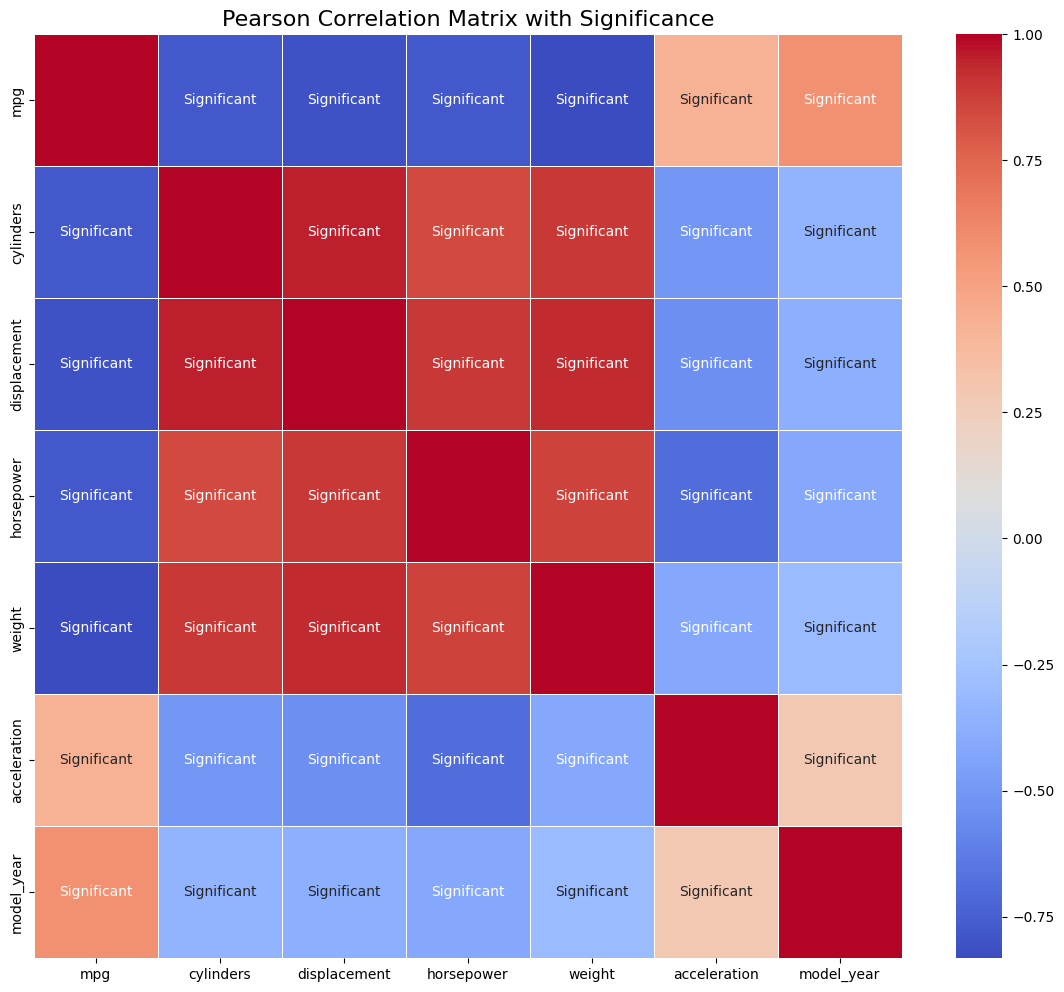


Generating Spearman correlation significance matrix...


C:\Users\kasht\AppData\Local\Temp\ipykernel_15692\3399758375.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  labels_spearman = p_values_spearman_df.applymap(lambda p: 'Significant' if p < alpha else 'Not Significant')


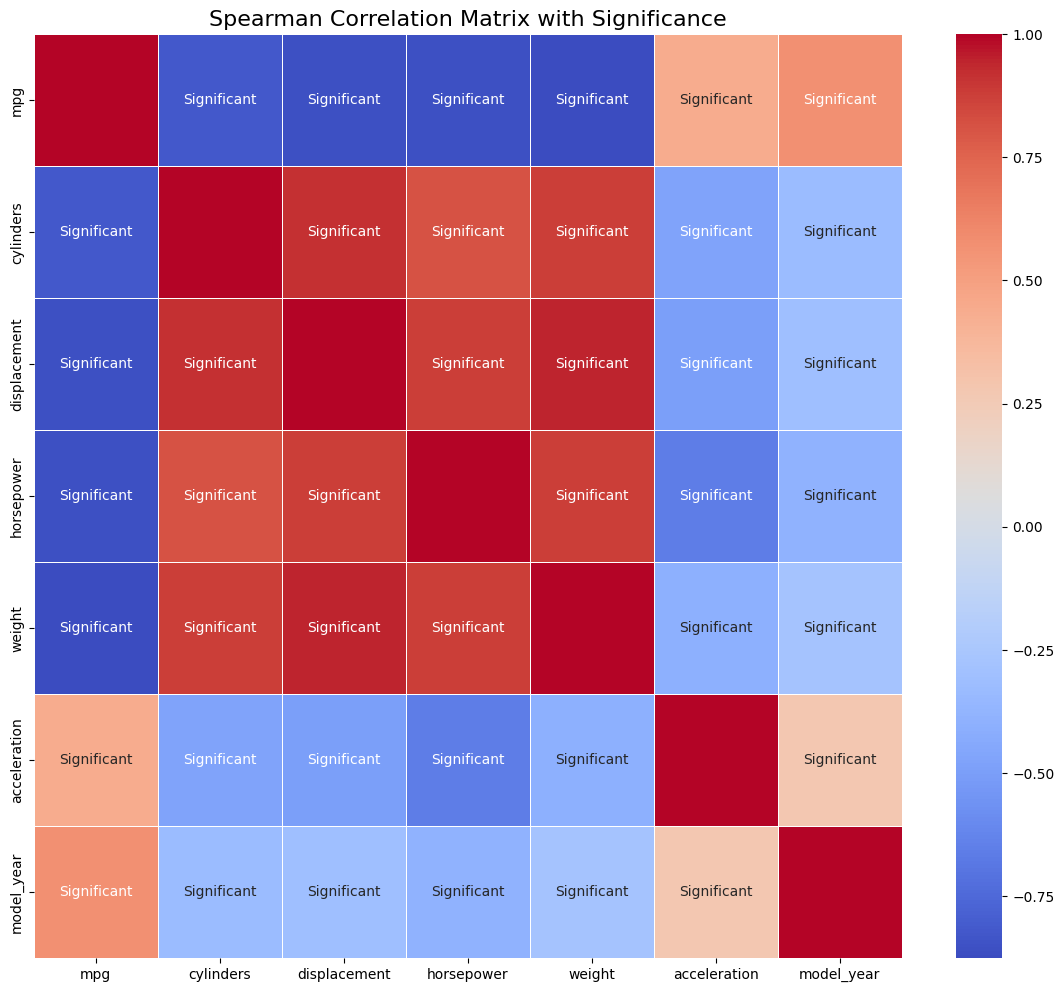

In [10]:
# Pearson Correlation Significance Matrix
print("Generating Pearson correlation significance matrix...")

# Calculate p-values for Pearson correlations
p_values_pearson = pd.DataFrame(np.zeros(pearson_corr.shape), index=df.columns, columns=df.columns)
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            _, p_value = stats.pearsonr(df[col1], df[col2])
            p_values_pearson.loc[col1, col2] = p_value

# Create a matrix of text labels based on p-values
labels_pearson = p_values_pearson.applymap(lambda p: 'Significant' if p < alpha else 'Not Significant')

# Set diagonal to empty strings to hide annotations
np.fill_diagonal(labels_pearson.values, '')

# Visualize the result
plt.figure(figsize=(14, 12))
sns.heatmap(pearson_corr, annot=labels_pearson, fmt='s', cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Matrix with Significance', fontsize=16)
plt.show()

# Spearman Correlation Significance Matrix
print("\nGenerating Spearman correlation significance matrix...")

# Calculate p-values for Spearman correlations
_, p_values_spearman = stats.spearmanr(df)
p_values_spearman_df = pd.DataFrame(p_values_spearman, index=df.columns, columns=df.columns)

# Create a matrix of text labels based on p-values
labels_spearman = p_values_spearman_df.applymap(lambda p: 'Significant' if p < alpha else 'Not Significant')

# Set diagonal to empty strings
np.fill_diagonal(labels_spearman.values, '')

# Visualize the result
plt.figure(figsize=(14, 12))
sns.heatmap(spearman_corr, annot=labels_spearman, fmt='s', cmap='coolwarm', linewidths=.5)
plt.title('Spearman Correlation Matrix with Significance', fontsize=16)
plt.show()

### Analyzing suitability

In [11]:
# Perform Bartlett's Test of Sphericity
print("Performing Bartlett's Test of Sphericity...")

chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(f"  Chi-Square Value: {chi_square_value:.2f}")
print(f"  P-value: {p_value}")

if p_value < 0.05:
    print("Result: The p-value is less than 0.05. We reject the null hypothesis.")
    print("Conclusion: The variables are correlated, and the data is suitable for factor analysis.")
else:
    print("Result: The p-value is greater than 0.05. We fail to reject the null hypothesis.")
    print("Conclusion: The variables are not correlated enough for factor analysis.")

# Perform Kaiser-Meyer-Olkin Test
print("\nPerforming Kaiser-Meyer-Olkin Test...")

kmo_all, kmo_model = calculate_kmo(df)
print(f"  Overall KMO for the dataset: {kmo_model:.2f}")

if kmo_model > 0.6:
    print("Result: The overall KMO score is greater than 0.6.")
    print("Conclusion: The sampling adequacy is acceptable for factor analysis.")
else:
    print("Result: The overall KMO score is less than 0.6.")
    print("Conclusion: The sampling adequacy is not sufficient for factor analysis.")

print("\nKMO per variable:")
kmo_per_variable = pd.Series(kmo_all, index=df.columns)
print(kmo_per_variable)

Performing Bartlett's Test of Sphericity...
  Chi-Square Value: 3453.87
  P-value: 0.0
Result: The p-value is less than 0.05. We reject the null hypothesis.
Conclusion: The variables are correlated, and the data is suitable for factor analysis.

Performing Kaiser-Meyer-Olkin Test...
  Overall KMO for the dataset: 0.81
Result: The overall KMO score is greater than 0.6.
Conclusion: The sampling adequacy is acceptable for factor analysis.

KMO per variable:
mpg             0.844367
cylinders       0.877930
displacement    0.838917
horsepower      0.842582
weight          0.789928
acceleration    0.700483
model_year      0.632569
dtype: float64


### Normalizing the dataset

In [12]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df)

# Convert the scaled NumPy array back to a pandas DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Display the first few rows of the standardized data
print("First 5 rows of the standardized dataset:")
print(df_scaled.head())

# Verify the standardization by checking the mean and standard deviation
print("\nVerification of standardization:")
print("Mean of each column:")
print(df_scaled.mean())
print("\nStandard deviation of each column:")
print(df_scaled.std())

First 5 rows of the standardized dataset:
        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0 -0.698638   1.483947      1.077290    0.664133  0.620540     -1.285258   
1 -1.083498   1.483947      1.488732    1.574594  0.843334     -1.466724   
2 -0.698638   1.483947      1.182542    1.184397  0.540382     -1.648189   
3 -0.955212   1.483947      1.048584    1.184397  0.536845     -1.285258   
4 -0.826925   1.483947      1.029447    0.924265  0.555706     -1.829655   

   model_year  
0   -1.625315  
1   -1.625315  
2   -1.625315  
3   -1.625315  
4   -1.625315  

Verification of standardization:
Mean of each column:
mpg             1.450087e-16
cylinders      -1.087565e-16
displacement   -7.250436e-17
horsepower     -1.812609e-16
weight         -1.812609e-17
acceleration    4.350262e-16
model_year     -1.160070e-15
dtype: float64

Standard deviation of each column:
mpg             1.001278
cylinders       1.001278
displacement    1.001278
horsepower      1.001

### Determining the Optimal Number of Factors

In [13]:
# Perform initial Factor Analysis to get eigenvalues
fa_initial = FactorAnalyzer(method='principal', rotation=None, n_factors=df_scaled.shape[1])
fa_initial.fit(df_scaled)

# Get the eigenvalues from the fitted model
eigenvalues, _ = fa_initial.get_eigenvalues()

# Create a DataFrame to display the results clearly
eigenvalue_df = pd.DataFrame({
    'Factor': range(1, len(eigenvalues) + 1),
    'Eigenvalue': eigenvalues,
    'Variance Explained (%)': fa_initial.get_factor_variance()[1] * 100,
    'Cumulative Variance (%)': fa_initial.get_factor_variance()[2] * 100
})

print("Eigenvalues and Variance explained by Each Factor:")
print(eigenvalue_df.to_string())

Eigenvalues and Variance explained by Each Factor:
   Factor  Eigenvalue  Variance Explained (%)  Cumulative Variance (%)
0       1    5.010636               71.580512                71.580512
1       2    0.865591               12.365591                83.946103
2       3    0.728394               10.405625                94.351728
3       4    0.183915                2.627358                96.979087
4       5    0.121916                1.741662                98.720749
5       6    0.054257                0.775102                99.495851
6       7    0.035290                0.504149               100.000000


c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [14]:
# Kaiser's Criterion
kaiser_factors = sum(eigenvalues > 1)
print(f"Number of factors to retain based on Kaiser's Criterion (Eigenvalue > 1): {kaiser_factors}")

Number of factors to retain based on Kaiser's Criterion (Eigenvalue > 1): 1


Number of factors to explain at least 75.0% of variance: 2


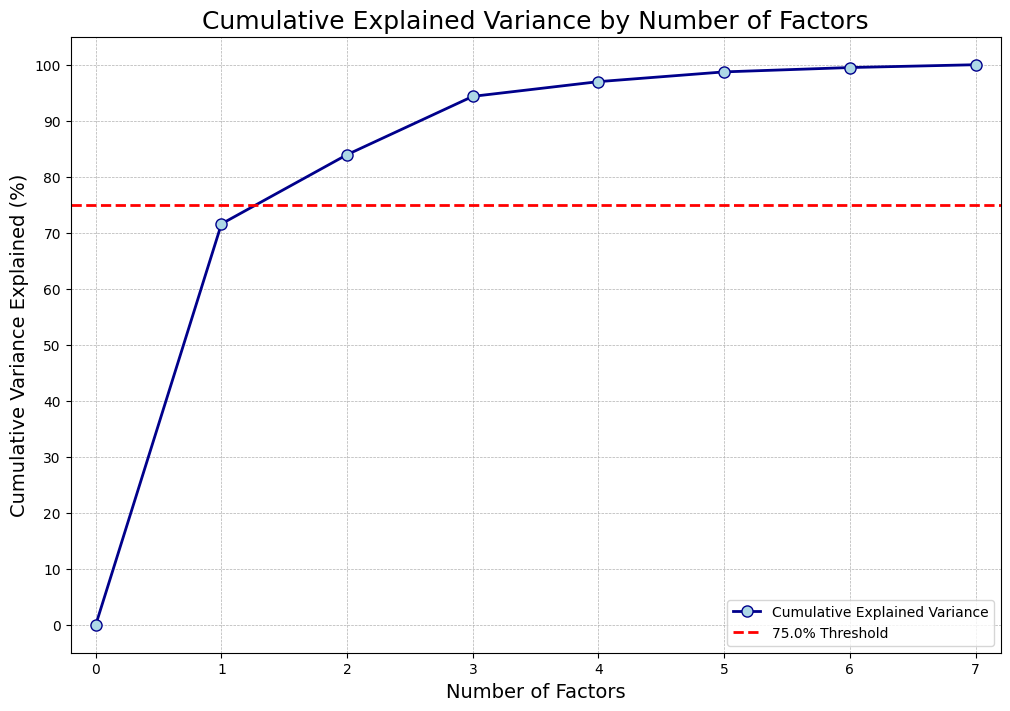

In [15]:
# Explained Variance Criterion
variance_threshold = 75.0
explained_variance_factors = (eigenvalue_df['Cumulative Variance (%)'] >= variance_threshold).idxmax() + 1
print(f"Number of factors to explain at least {variance_threshold}% of variance: {explained_variance_factors}")

# Cumulative Variance Plot
plt.figure(figsize=(12, 8))

# Prepare data for plotting
x_values = np.concatenate(([0], eigenvalue_df['Factor'].values))
y_values = np.concatenate(([0], eigenvalue_df['Cumulative Variance (%)'].values))

# Plot the cumulative variance line
plt.plot(
    x_values, 
    y_values, 
    'o-', 
    color='darkblue', 
    markersize=8, 
    linewidth=2,
    markerfacecolor='lightblue',
    label='Cumulative Explained Variance'
)

# Add the threshold line for reference
plt.axhline(y=variance_threshold, color='red', linestyle='--', linewidth=2, label=f'{variance_threshold}% Threshold')

# Set titles and labels for clarity
plt.title('Cumulative Explained Variance by Number of Factors', fontsize=18)
plt.xlabel('Number of Factors', fontsize=14)
plt.ylabel('Cumulative Variance Explained (%)', fontsize=14)

# Set axis limits with padding
plt.xlim(-0.2, df_scaled.shape[1] + 0.2)
plt.ylim(-5, 105)
plt.xticks(np.arange(0, df_scaled.shape[1] + 1, 1))
plt.yticks(np.arange(0, 101, 10))

# Add grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right')

# Show the plot
plt.show()

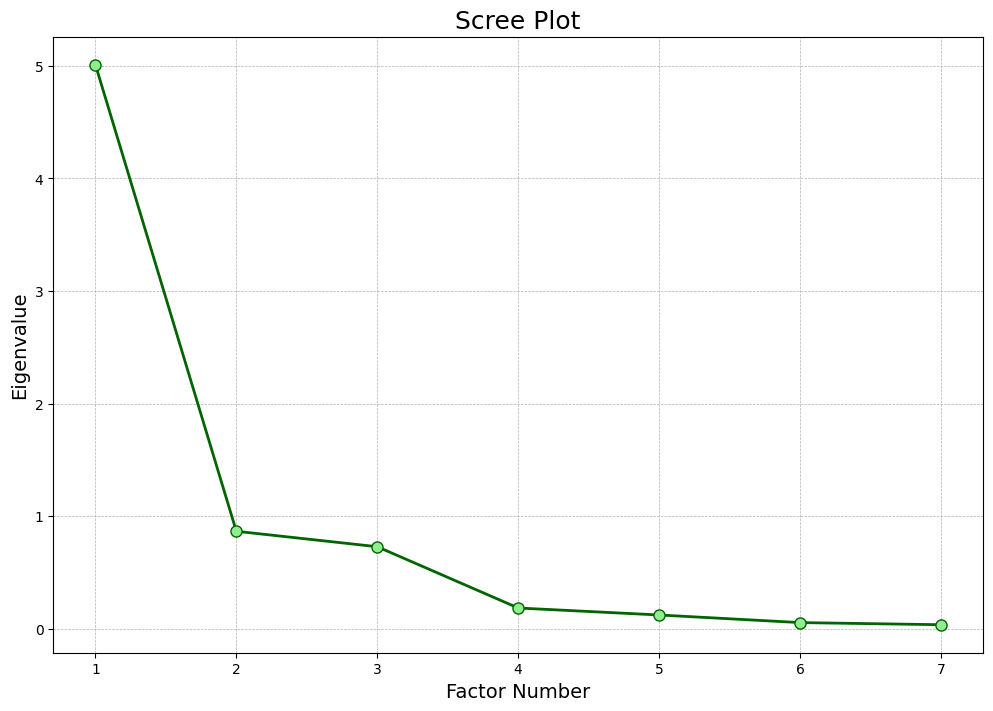

In [16]:
# Scree Plot
plt.figure(figsize=(12, 8))

# Plotting the eigenvalues
plt.plot(
    eigenvalue_df['Factor'], 
    eigenvalue_df['Eigenvalue'], 
    'o-',
    color='darkgreen', 
    markersize=8, 
    linewidth=2, 
    markerfacecolor='lightgreen',
    label='Eigenvalues'
)

plt.title('Scree Plot', fontsize=18)
plt.xlabel('Factor Number', fontsize=14)
plt.ylabel('Eigenvalue', fontsize=14)
plt.xticks(eigenvalue_df['Factor'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

### Building Factor Model

In [17]:
# Define the final number of factors based on the analysis
final_n_factors = 2

# List of rotation methods to compare
orthogonal_rotations = ['varimax', 'oblimax', 'quartimax']
oblique_rotations = ['promax', 'oblimin', 'quartimin']

In [18]:
# Perform Factor Analysis without rotation
fa_unrotated = FactorAnalyzer(n_factors=final_n_factors, method='principal', rotation=None)
fa_unrotated.fit(df_scaled)

# Get the unrotated factor loadings
loadings_unrotated = fa_unrotated.loadings_
loadings_unrotated_df = pd.DataFrame(loadings_unrotated, index=df_scaled.columns, columns=[f'Factor {i+1}' for i in range(final_n_factors)])

print("Factor Loadings Matrix (Unrotated):")
print(loadings_unrotated_df)

Factor Loadings Matrix (Unrotated):
              Factor 1  Factor 2
mpg          -0.891203  0.192362
cylinders     0.931471  0.184717
displacement  0.960926  0.167804
horsepower    0.946443  0.079307
weight        0.926819  0.209031
acceleration -0.637726 -0.006486
model_year   -0.513746  0.846336


c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [19]:
# Loop through and display results for orthogonal rotations
print("Orthogonal Rotations (factors are assumed to be uncorrelated):\n")
for rotation_method in orthogonal_rotations:
    # Initialize and fit the model
    fa = FactorAnalyzer(n_factors=final_n_factors, method='principal', rotation=rotation_method)
    fa.fit(df_scaled)
    
    # Get the factor loadings
    loadings_df = pd.DataFrame(fa.loadings_, index=df_scaled.columns, columns=[f'Factor {i+1}' for i in range(final_n_factors)])
    
    print(f"\nFactor Loadings Matrix ({rotation_method.capitalize()} rotation):")
    print(loadings_df)


# Loop through and display results for oblique rotations
print("\n\nOblique Rotations (factors are allowed to be correlated):\n")
for rotation_method in oblique_rotations:
    # Initialize and fit the model
    fa = FactorAnalyzer(n_factors=final_n_factors, method='principal', rotation=rotation_method)
    fa.fit(df_scaled)
    
    # Get the factor loadings
    loadings_df = pd.DataFrame(fa.loadings_, index=df_scaled.columns, columns=[f'Factor {i+1}' for i in range(final_n_factors)])
    
    print(f"\nFactor Loadings Matrix ({rotation_method.capitalize()} rotation):")
    print(loadings_df)
    
    # Show the factor correlation matrix
    if fa.phi_ is not None:
        factor_corr_df = pd.DataFrame(fa.phi_, columns=[f'Factor {i+1}' for i in range(final_n_factors)], index=[f'Factor {i+1}' for i in range(final_n_factors)])
        print(f"\nFactor Correlation Matrix ({rotation_method.capitalize()} rotation):")
        print(factor_corr_df)

c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Orthogonal Rotations (factors are assumed to be uncorrelated):


Factor Loadings Matrix (Varimax rotation):
              Factor 1  Factor 2
mpg          -0.762622  0.499653
cylinders     0.935654 -0.162206
displacement  0.957067 -0.188571
horsepower    0.911762 -0.265959
weight        0.940046 -0.137844
acceleration -0.597492  0.223025
model_year   -0.175443  0.974391

Factor Loadings Matrix (Oblimax rotation):
              Factor 1  Factor 2
mpg          -0.891106  0.192809
cylinders     0.931564  0.184250
displacement  0.961010  0.167322
horsepower    0.946483  0.078832
weight        0.926923  0.208566
acceleration -0.637730 -0.006166
model_year   -0.513321  0.846593

Factor Loadings Matrix (Quartimax rotation):
              Factor 1  Factor 2
mpg          -0.841983  0.349730
cylinders     0.949508  0.013931
displacement  0.975434 -0.008011
horsepower    0.945250 -0.092453
weight        0.949310  0.038685
acceleration -0.628466  0.108480
model_year   -0.352912  0.925025


Oblique 

c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'f

In [20]:
# Calculate and display the communalities
communalities = fa_unrotated.get_communalities()
communalities_df = pd.DataFrame(communalities, index=df_scaled.columns, columns=['Communalities'])

print("Proportion of variance in each variable accounted for by the factors (Communalities):")
print(communalities_df)

Proportion of variance in each variable accounted for by the factors (Communalities):
              Communalities
mpg                0.831246
cylinders          0.901759
displacement       0.951536
horsepower         0.902045
weight             0.902686
acceleration       0.406737
model_year         0.980219


### Visualizing the results

In [21]:
# Fit the final model with Varimax rotation
fa_varimax = FactorAnalyzer(n_factors=2, method='principal', rotation='varimax')
fa_varimax.fit(df_scaled)

# Calculate factor scores for each car
factor_scores_varimax = fa_varimax.transform(df_scaled)
df_scores_varimax = pd.DataFrame(factor_scores_varimax, columns=['Factor1_PowerSize', 'Factor2_ModernityEfficiency'])

# Add scores to the original dataframe for practical application
df_with_factors_varimax = pd.concat([df.reset_index(drop=True), df_scores_varimax], axis=1)

# Show top 5 cars for each factor
print("Top 5 Cars with the Highest 'Power & Size' Score (Varimax):")
print(df_with_factors_varimax.sort_values('Factor1_PowerSize', ascending=False).head())

print("\nTop 5 Cars with the Highest 'Modernity & Efficiency' Score (Varimax):")
print(df_with_factors_varimax.sort_values('Factor2_ModernityEfficiency', ascending=False).head())

Top 5 Cars with the Highest 'Power & Size' Score (Varimax):
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
94   12.0          8         455.0       225.0    4951          11.0   
93   13.0          8         440.0       215.0    4735          11.0   
89   12.0          8         429.0       198.0    4952          11.5   
115  16.0          8         400.0       230.0    4278           9.5   
66   11.0          8         429.0       208.0    4633          11.0   

     model_year  Factor1_PowerSize  Factor2_ModernityEfficiency  
94           73           2.370137                    -0.330163  
93           73           2.202942                    -0.356500  
89           73           2.139623                    -0.363221  
115          73           2.082657                    -0.394779  
66           72           2.060148                    -0.718258  

Top 5 Cars with the Highest 'Modernity & Efficiency' Score (Varimax):
      mpg  cylinders  displacement  hors

c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


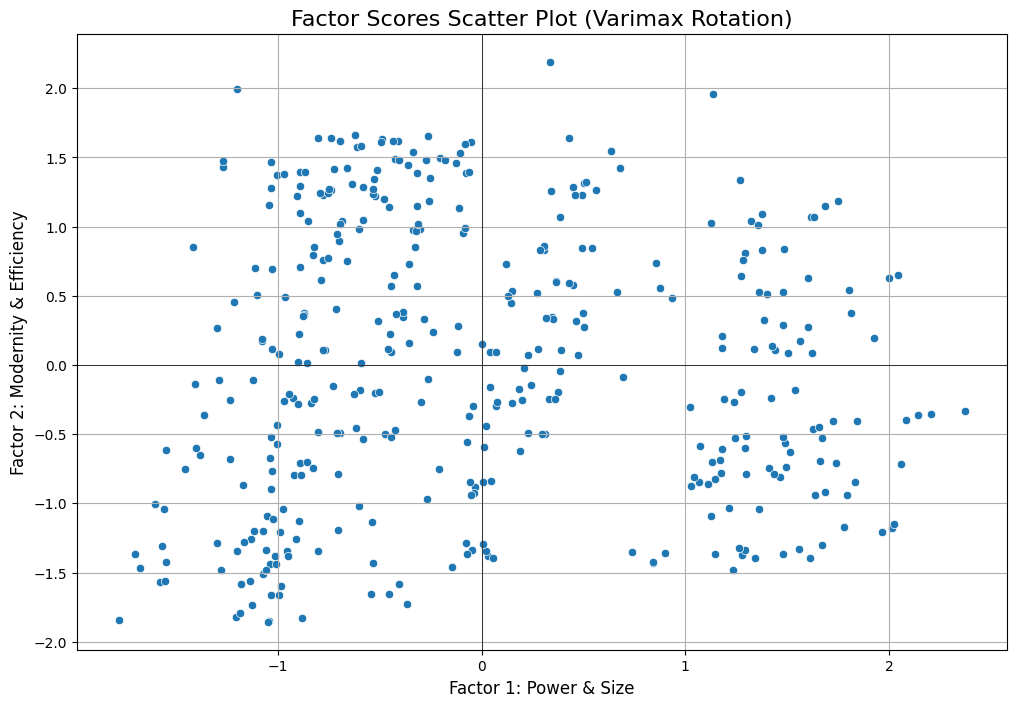

In [22]:
# Visualize the factor scores
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Factor1_PowerSize', y='Factor2_ModernityEfficiency', data=df_scores_varimax)
plt.title('Factor Scores Scatter Plot (Varimax Rotation)', fontsize=16)
plt.xlabel('Factor 1: Power & Size', fontsize=12)
plt.ylabel('Factor 2: Modernity & Efficiency', fontsize=12)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

In [23]:
# Fit the final model with Oblimin rotation
fa_oblimin = FactorAnalyzer(n_factors=2, method='principal', rotation='oblimin')
fa_oblimin.fit(df_scaled)

# Calculate factor scores
factor_scores_oblimin = fa_oblimin.transform(df_scaled)
df_scores_oblimin = pd.DataFrame(factor_scores_oblimin, columns=['Factor1_PowerSize', 'Factor2_ModernityEfficiency'])

# Add scores to the original dataframe
df_with_factors_oblimin = pd.concat([df.reset_index(drop=True), df_scores_oblimin], axis=1)

# Show top 5 cars for each factor
print("Top 5 Cars with the Highest 'Power & Size' Score (Oblimin):")
print(df_with_factors_oblimin.sort_values('Factor1_PowerSize', ascending=False).head())

print("\nTop 5 Cars with the Highest 'Modernity & Efficiency' Score (Oblimin):")
print(df_with_factors_oblimin.sort_values('Factor2_ModernityEfficiency', ascending=False).head())

Top 5 Cars with the Highest 'Power & Size' Score (Oblimin):
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
94  12.0          8         455.0       225.0    4951          11.0   
8   14.0          8         455.0       225.0    4425          10.0   
6   14.0          8         454.0       220.0    4354           9.0   
93  13.0          8         440.0       215.0    4735          11.0   
7   14.0          8         440.0       215.0    4312           8.5   

    model_year  Factor1_PowerSize  Factor2_ModernityEfficiency  
94          73           2.383692                    -0.741297  
8           70           2.229059                    -1.484717  
6           70           2.228941                    -1.513698  
93          73           2.226698                    -0.737859  
7           70           2.186182                    -1.536386  

Top 5 Cars with the Highest 'Modernity & Efficiency' Score (Oblimin):
      mpg  cylinders  displacement  horsepower  weig

c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


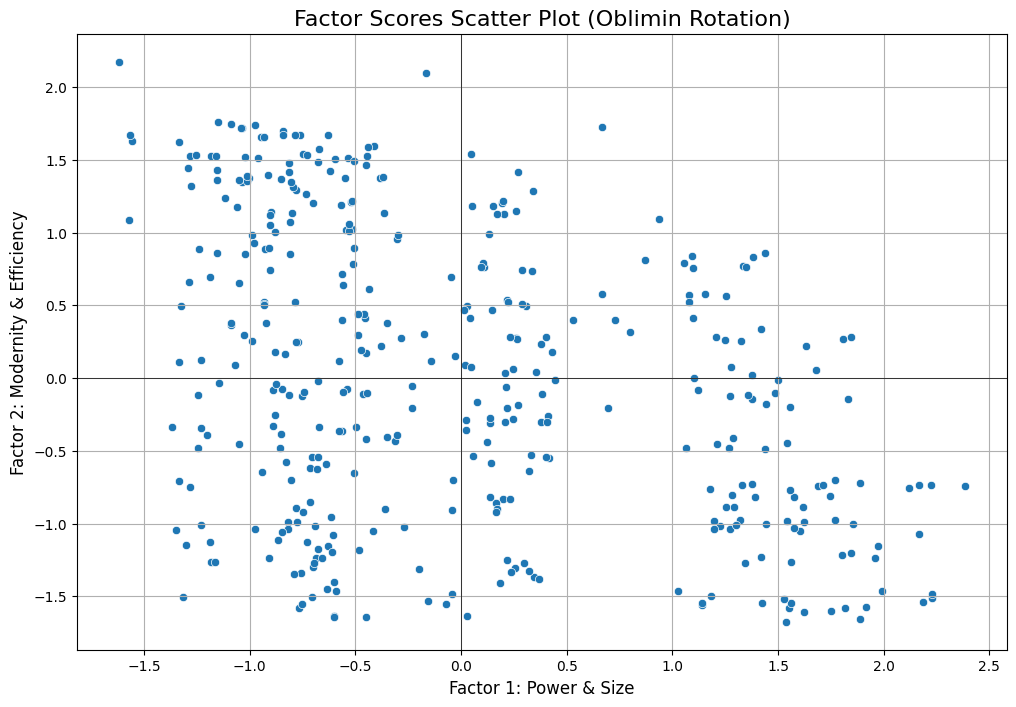

In [24]:
# Visualize the factor scores
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Factor1_PowerSize', y='Factor2_ModernityEfficiency', data=df_scores_oblimin)
plt.title('Factor Scores Scatter Plot (Oblimin Rotation)', fontsize=16)
plt.xlabel('Factor 1: Power & Size', fontsize=12)
plt.ylabel('Factor 2: Modernity & Efficiency', fontsize=12)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

### Reproducing correlation matrices

c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


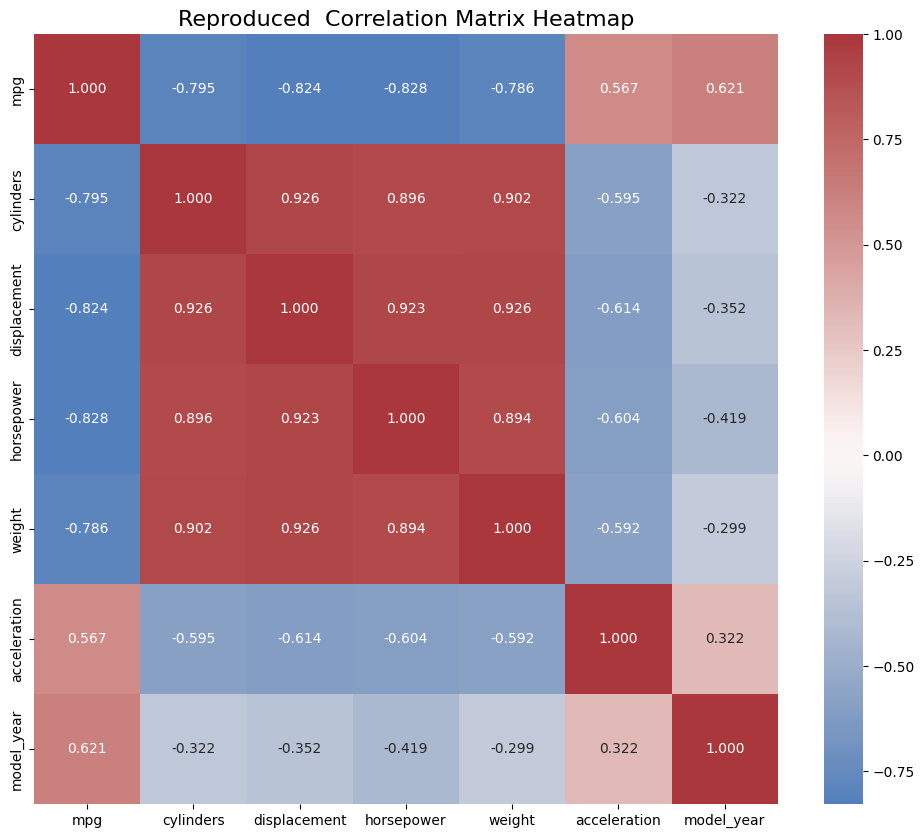

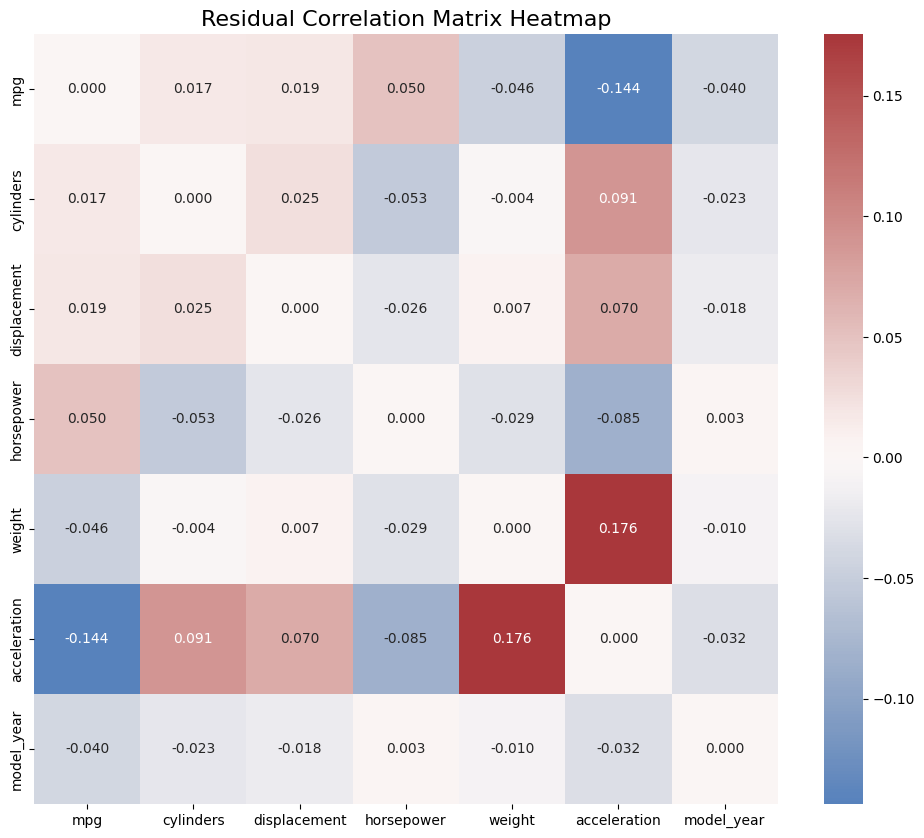

In [25]:
# Create and fit an unrotated model to get the necessary components.
fa_unrotated = FactorAnalyzer(n_factors=2, method='principal', rotation=None)
fa_unrotated.fit(df_scaled)

# Get the factor loadings (L)
loadings = fa_unrotated.loadings_

# Get the uniquenesses (U^2)
uniquenesses = fa_unrotated.get_uniquenesses()

# Calculate the reproduced correlation matrix
reproduced_corr = loadings @ loadings.T + np.diag(uniquenesses)

# Convert to a pandas DataFrame for better readability
reproduced_corr_df = pd.DataFrame(reproduced_corr, index=df_scaled.columns, columns=df_scaled.columns)

# Get the original correlation matrix
original_corr = df_scaled.corr()

# Calculate the residual matrix
residual_corr_df = original_corr - reproduced_corr_df

# Visualize the residual correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(reproduced_corr_df, annot=True, fmt='.3f', cmap='vlag', center=0)
plt.title('Reproduced  Correlation Matrix Heatmap', fontsize=16)
plt.show()

# Visualize the residual correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(residual_corr_df, annot=True, fmt='.3f', cmap='vlag', center=0)
plt.title('Residual Correlation Matrix Heatmap', fontsize=16)
plt.show()

c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


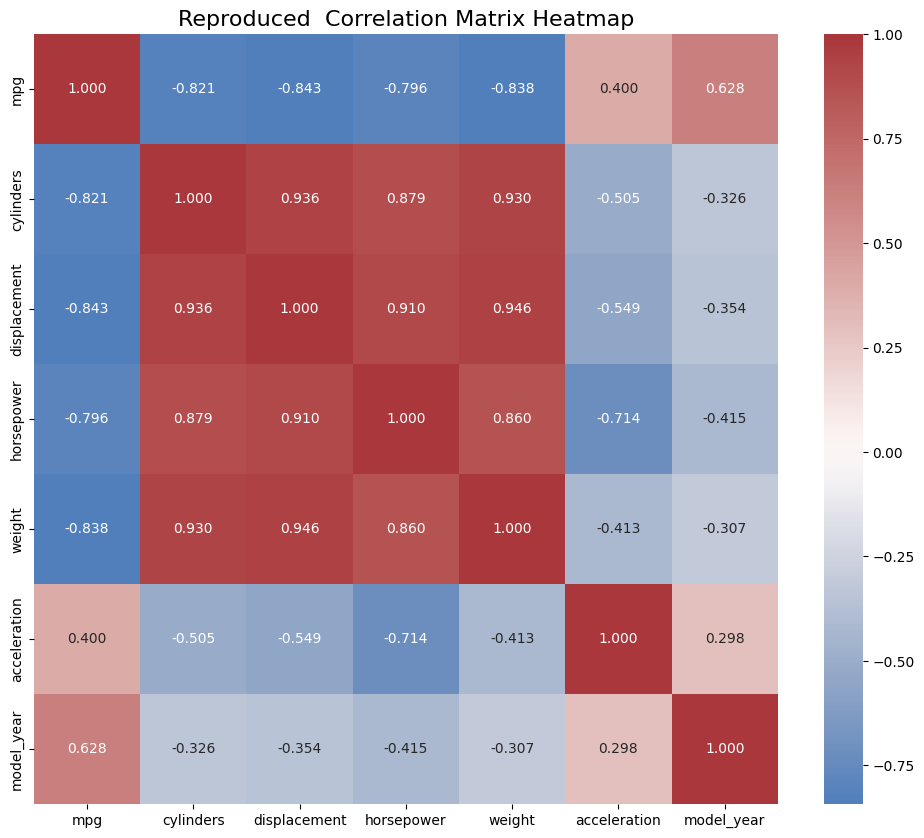

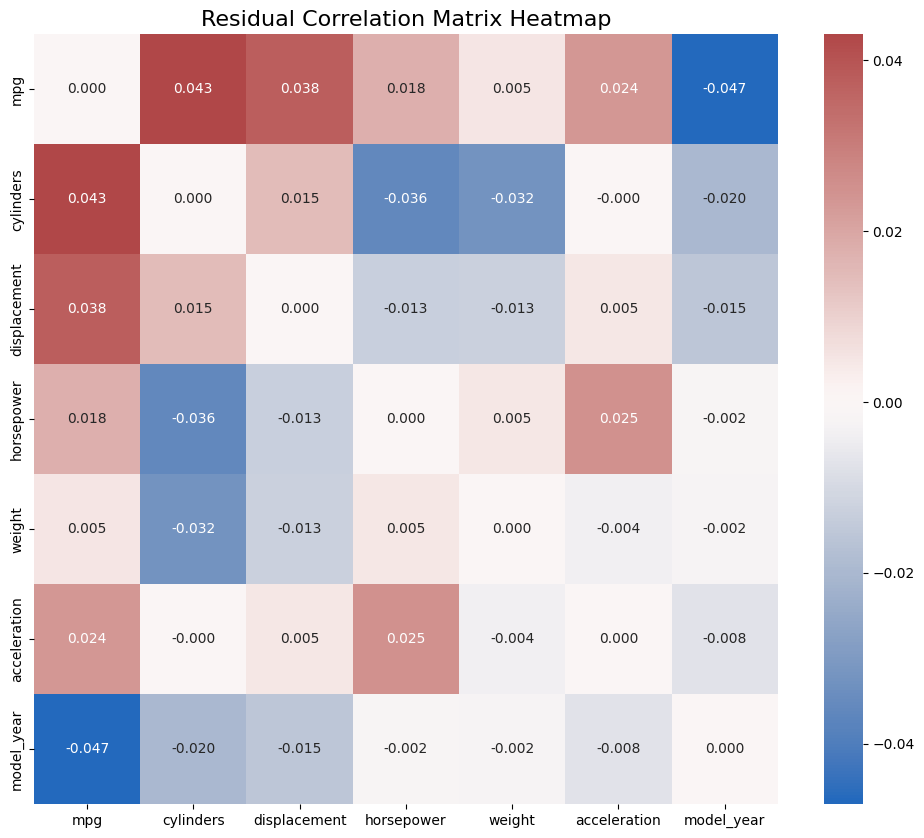

In [26]:
# Create and fit an unrotated model to get the necessary components.
fa_unrotated = FactorAnalyzer(n_factors=3, method='principal', rotation=None)
fa_unrotated.fit(df_scaled)

# Get the factor loadings (L)
loadings = fa_unrotated.loadings_

# Get the uniquenesses (U^2)
uniquenesses = fa_unrotated.get_uniquenesses()

# Calculate the reproduced correlation matrix
reproduced_corr = loadings @ loadings.T + np.diag(uniquenesses)

# Convert to a pandas DataFrame for better readability
reproduced_corr_df = pd.DataFrame(reproduced_corr, index=df_scaled.columns, columns=df_scaled.columns)

# Get the original correlation matrix
original_corr = df_scaled.corr()

# Calculate the residual matrix
residual_corr_df = original_corr - reproduced_corr_df

# Visualize the residual correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(reproduced_corr_df, annot=True, fmt='.3f', cmap='vlag', center=0)
plt.title('Reproduced  Correlation Matrix Heatmap', fontsize=16)
plt.show()

# Visualize the residual correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(residual_corr_df, annot=True, fmt='.3f', cmap='vlag', center=0)
plt.title('Residual Correlation Matrix Heatmap', fontsize=16)
plt.show()

c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


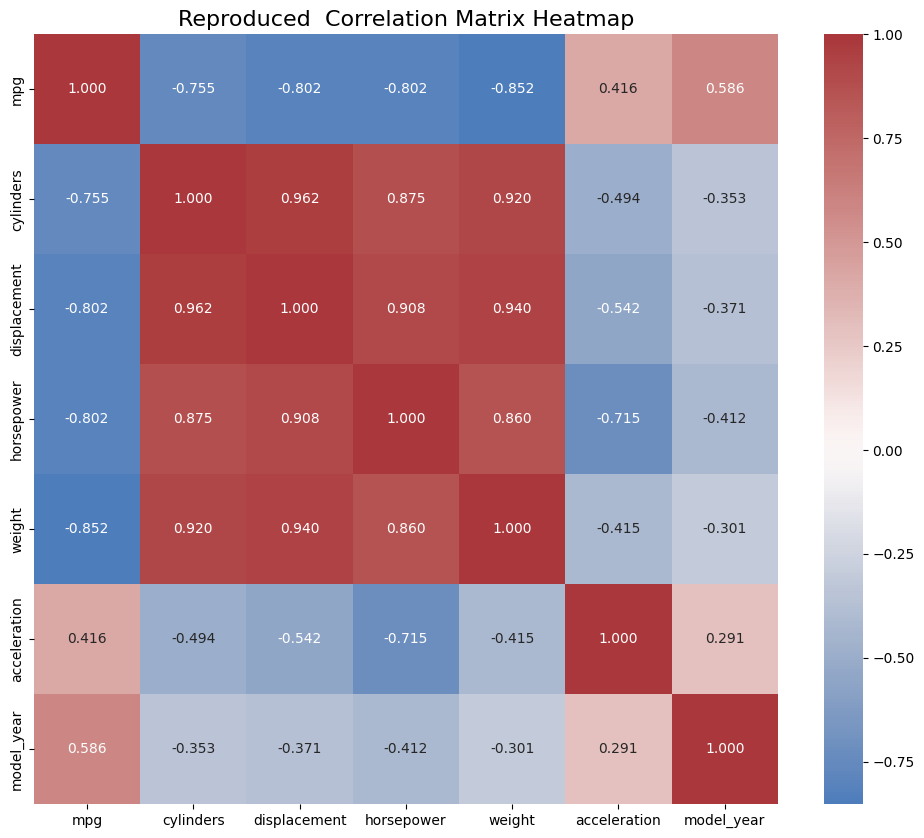

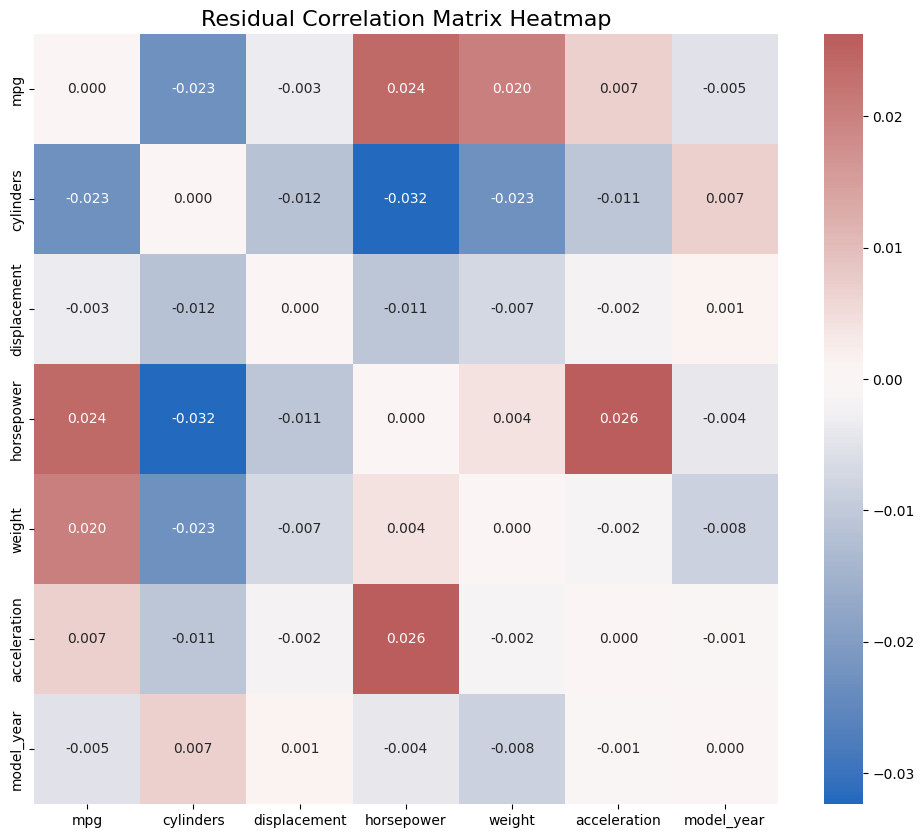

In [27]:
# Create and fit an unrotated model to get the necessary components.
fa_unrotated = FactorAnalyzer(n_factors=4, method='principal', rotation=None)
fa_unrotated.fit(df_scaled)

# Get the factor loadings (L)
loadings = fa_unrotated.loadings_

# Get the uniquenesses (U^2)
uniquenesses = fa_unrotated.get_uniquenesses()

# Calculate the reproduced correlation matrix
reproduced_corr = loadings @ loadings.T + np.diag(uniquenesses)

# Convert to a pandas DataFrame for better readability
reproduced_corr_df = pd.DataFrame(reproduced_corr, index=df_scaled.columns, columns=df_scaled.columns)

# Get the original correlation matrix
original_corr = df_scaled.corr()

# Calculate the residual matrix
residual_corr_df = original_corr - reproduced_corr_df

# Visualize the residual correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(reproduced_corr_df, annot=True, fmt='.3f', cmap='vlag', center=0)
plt.title('Reproduced  Correlation Matrix Heatmap', fontsize=16)
plt.show()

# Visualize the residual correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(residual_corr_df, annot=True, fmt='.3f', cmap='vlag', center=0)
plt.title('Residual Correlation Matrix Heatmap', fontsize=16)
plt.show()

### Calculating model adequacy

In [28]:
# Define necessary parameters
n = len(df)               # Number of observations
m = df_scaled.shape[1]    # Number of variables
k = 2                     # Number of factors

print(f"Number of observations (n): {n}")
print(f"Number of variables (m): {m}")
print(f"Number of factors (k): {k}")

Number of observations (n): 392
Number of variables (m): 7
Number of factors (k): 2


In [29]:
# Define alpha
alpha = 0.05

print(f"Significance level: {alpha}")

Significance level: 0.05


In [ ]:
# Lawley-Bartlett Test for Sufficiency of Factors

# H0: The k-factor model is sufficient to reproduce the correlation matrix.

# The original and reproduced correlation matrices should be available from previous steps.
fa_model_for_test = FactorAnalyzer(n_factors=k, method='principal', rotation=None)
fa_model_for_test.fit(df_scaled)

# Get the original correlation matrix
original_corr = df_scaled.corr()

# Calculate the reproduced correlation matrix
loadings = fa_model_for_test.loadings_
uniquenesses = fa_model_for_test.get_uniquenesses()
reproduced_corr = loadings @ loadings.T + np.diag(uniquenesses)

# Calculate the determinants of the matrices
det_reproduced_corr = np.linalg.det(reproduced_corr)
det_original_corr = np.linalg.det(original_corr)

# Calculate the Chi-Square statistic
chi_square_statistic = (n - 1) * np.log(det_reproduced_corr / det_original_corr)

# Calculate the degrees of freedom (df)
degrees_of_freedom = 0.5 * ((m - k)**2 - m - k)

# Calculate the p-value
p_value = stats.chi2.sf(chi_square_statistic, degrees_of_freedom)

# Display results
print("Lawley-Bartlett Test for model sufficiency:")

print(f"  Determinant of Reproduced Correlation Matrix: {det_reproduced_corr:.6f}")
print(f"  Determinant of Original Correlation Matrix:  {det_original_corr:.6f}\n")

print(f"  Calculated Chi-Square Statistic: {chi_square_statistic:.4f}")
print(f"  Degrees of Freedom (df): {degrees_of_freedom:.1f}")
print(f"  P-value: {p_value:.4f}\n")

if p_value > alpha:
    print("Conclusion: The p-value is greater than alpha.")
    print("            We FAIL to reject the null hypothesis (H0).")
    print(f"            The model with {k} factors is considered SUFFICIENT to reproduce the original correlation matrix.")
else:
    print("Conclusion: The p-value is less than or equal to alpha.")
    print("            We REJECT the null hypothesis (H0).")
    print(f"            The model with {k} factors is considered NOT SUFFICIENT. More factors may be needed.")

Lawley-Bartlett Test for model sufficiency:
  Determinant of Reproduced Correlation Matrix: 0.000209
  Determinant of Original Correlation Matrix:  0.000136

  Calculated Chi-Square Statistic: 168.1639
  Degrees of Freedom (df): 8.0
  P-value: 0.0000

Conclusion: The p-value is less than or equal to alpha.
            We REJECT the null hypothesis (H0).
            The model with 2 factors is considered NOT SUFFICIENT. More factors may be needed.


c:\Users\kasht\Documents\GitHub\1f989751bcea4065b5eb562c5217d641bc0198b3691ae3788917facf6af69728\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [42]:
# Bartlett-Wilks Test on the Residual Matrix

# H0: The variables in the residual matrix are uncorrelated.

# Calculate the residual correlation matrix
residual_corr = original_corr - reproduced_corr

# Calculate the determinant of the residual matrix
det_residual_corr = np.linalg.det(residual_corr)

# Calculate the Chi-Square statistic using the standard formula for Bartlett's sphericity test
chi_square_statistic_bw = -(n - (2 * m + 5) / 6) * np.log(det_residual_corr)

# Calculate degrees of freedom
degrees_of_freedom_bw = m * (m - 1) / 2

# Calculate the p-value
p_value_bw = stats.chi2.sf(chi_square_statistic_bw, degrees_of_freedom_bw)

# Display results
print("Bartlett-Wilks Test on the Residual Matrix (Standard Implementation):")
print(f"  Determinant of Residual Correlation Matrix: {det_residual_corr:.6f}\n")
print(f"  Calculated Chi-Square Statistic: {chi_square_statistic_bw:.4f}")
print(f"  Degrees of Freedom (df): {degrees_of_freedom_bw:.1f}")
print(f"  P-value: {p_value_bw:.4f}\n")

if p_value_bw > alpha:
    print("Conclusion: The p-value is greater than alpha.")
    print("            We FAIL to reject the null hypothesis (H0).")
    print("            The factoring process can be considered complete.")
else:
    print("Conclusion: The p-value is less than or equal to alpha.")
    print("            We REJECT the null hypothesis (H0).")
    print("            The residual matrix may still contain significant correlations.")

Bartlett-Wilks Test on the Residual Matrix (Standard Implementation):
  Determinant of Residual Correlation Matrix: 0.000000

  Calculated Chi-Square Statistic: 7497.3596
  Degrees of Freedom (df): 21.0
  P-value: 0.0000

Conclusion: The p-value is less than or equal to alpha.
            We REJECT the null hypothesis (H0).
            The residual matrix may still contain significant correlations.


In [32]:
# Lawley and Maxwell's Test (approximation of Lawley-Bartlett)

# H0: The k-factor model is sufficient.

# Calculate n' (adjusted sample size)
n_prime = n - (2*m + 5)/6 - (2*k)/3

# Extract the upper triangle of the residual matrix (off-diagonal elements)
off_diag_residuals = residual_corr.values[np.triu_indices(m, k=1)]

# Create a matrix of uniqueness products (ui^2 * uj^2) for the denominator
uniqueness_matrix = np.outer(uniquenesses, uniquenesses)
off_diag_uniqueness_products = uniqueness_matrix[np.triu_indices(m, k=1)]

# Calculate the sum term for the formula
epsilon = 1e-9
sum_term_lm = np.sum((off_diag_residuals**2) / (off_diag_uniqueness_products + epsilon))

# Calculate the Chi-Square statistic
chi_square_lm = n_prime * sum_term_lm

# Calculate degrees of freedom
df_lm = 0.5 * ((m - k)**2 - m - k)

# Calculate the p-value
p_value_lm = stats.chi2.sf(chi_square_lm, df_lm) if df_lm > 0 else np.nan

# Print results
print("Lawley and Maxwell's Test (approximates Lawley-Bartlett):")

print(f"  Chi-Square: {chi_square_lm:.4f}")
print(f"  Degrees of Freedom: {df_lm:.1f}")
print(f"  P-value: {p_value_lm:.4f}\n")

if p_value_lm > alpha:
    print("Conclusion: The p-value is greater than alpha.")
    print("            We FAIL to reject the null hypothesis (H0).")
    print(f"            The model with {k} factors is considered SUFFICIENT to reproduce the original correlation matrix.")
else:
    print("Conclusion: The p-value is less than or equal to alpha.")
    print("            We REJECT the null hypothesis (H0).")
    print(f"            The model with {k} factors is considered NOT SUFFICIENT. More factors may be needed.")

Lawley and Maxwell's Test (approximates Lawley-Bartlett):
  Chi-Square: 1330.7332
  Degrees of Freedom: 8.0
  P-value: 0.0000

Conclusion: The p-value is less than or equal to alpha.
            We REJECT the null hypothesis (H0).
            The model with 2 factors is considered NOT SUFFICIENT. More factors may be needed.


In [33]:
# Lawley's Test (approximation of Bartlett-Wilks)

# H0: All residual correlations are zero.

# Calculate the sum of squared off-diagonal residuals
sum_sq_residuals_l = np.sum(off_diag_residuals**2)

# Calculate the Chi-Square statistic according to the paper
chi_square_l = n * sum_sq_residuals_l

# Calculate degrees of freedom
df_l = 0.5 * m * (m - 1)

# Calculate the p-value
p_value_l = stats.chi2.sf(chi_square_l, df_l) if df_l > 0 else np.nan

# Display results
print("Lawley's Test (approximates Bartlett-Wilks):")

print(f"   Chi-Square: {chi_square_l:.4f}")
print(f"   Degrees of Freedom: {df_l:.1f}")
print(f"   P-value: {p_value_l:.4f}\n")

if p_value_l > alpha:
    print("Conclusion: The p-value is greater than alpha.")
    print("            We FAIL to reject the null hypothesis (H0).")
    print("            The factoring process can be considered complete for the given number of factors.")
else:
    print("Conclusion: The p-value is less than or equal to alpha.")
    print("            We REJECT the null hypothesis (H0).")
    print("            The residual matrix may still contain significant correlations. More factors might be needed.")

Lawley's Test (approximates Bartlett-Wilks):
   Chi-Square: 33.6218
   Degrees of Freedom: 21.0
   P-value: 0.0398

Conclusion: The p-value is less than or equal to alpha.
            We REJECT the null hypothesis (H0).
            The residual matrix may still contain significant correlations. More factors might be needed.


In [34]:
# Barts's Test

# H0: The residual matrix contains no significant correlations.

# Apply Fisher's z-transformation to the off-diagonal residuals
z_transformed_residuals = np.arctanh(off_diag_residuals)

# Calculate the mean of the transformed residuals
mean_z = np.mean(z_transformed_residuals)

# Calculate the sum of squared differences from the mean
sum_sq_diff_barta = np.sum((z_transformed_residuals - mean_z)**2)

# Calculate the Chi-Square statistic
chi_square_barta = (n - 3) * sum_sq_diff_barta

# Calculate degrees of freedom
df_barta = 0.5 * ((m - k)**2 - m - k)

# Calculate the p-value
p_value_barta = stats.chi2.sf(chi_square_barta, df_barta) if df_barta > 0 else np.nan

print("Barts's Test:")

print(f"   Chi-Square: {chi_square_barta:.4f}")
print(f"   Degrees of Freedom: {df_barta:.1f}")
print(f"   P-value: {p_value_barta:.4f}\n")

if p_value_barta > 0.05:
    print("Conclusion: The p-value is greater than alpha.")
    print("            We FAIL to reject the null hypothesis (H0).")
    print("            The residual correlations are not statistically significant.")
else:
    print("Conclusion: The p-value is less than or equal to alpha.")
    print("            We REJECT the null hypothesis (H0).")
    print("            The residual correlations are statistically significant.")

Barts's Test:
   Chi-Square: 33.7203
   Degrees of Freedom: 8.0
   P-value: 0.0000

Conclusion: The p-value is less than or equal to alpha.
            We REJECT the null hypothesis (H0).
            The residual correlations are statistically significant.
